In [19]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
data=pd.read_excel('mangos_price.xlsx')
m_price = pd.DataFrame(data, columns= ['Year','Price'])


In [64]:
m_price

,Year,Price
0,2000,50
1,2001,55
2,2002,65
3,2003,76
4,2004,88
5,2005,98
6,2006,112
7,2007,120
8,2008,130
9,2009,139


In [65]:
%matplotlib inline

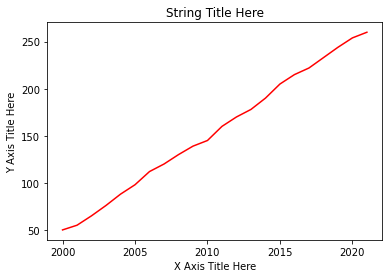

In [66]:
plt.plot(m_price['Year'],m_price['Price'], 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

In [67]:
m_price.head()

,Year,Price
0,2000,50
1,2001,55
2,2002,65
3,2003,76
4,2004,88


In [68]:
m_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    22 non-null     int64
 1   Price   22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [69]:
m_price.describe()

,Year,Price
count,22.000000,22.000000
mean,2010.500000,154.954545
std,6.493587,67.111476
min,2000.000000,50.000000
25%,2005.250000,101.500000
50%,2010.500000,152.500000
75%,2015.750000,212.500000
max,2021.000000,260.000000


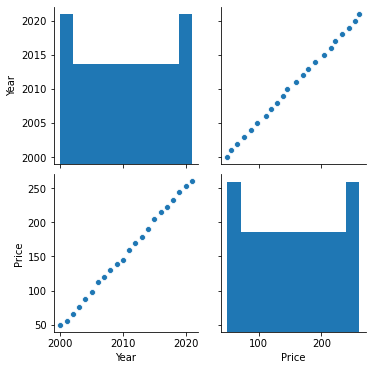

In [70]:
sns.pairplot(m_price)

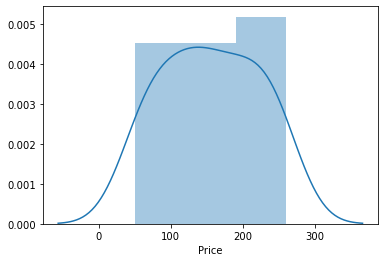

In [71]:
sns.distplot(m_price['Price'])

In [95]:
X = m_price[['Year']]
y = m_price[['Price']]
X
X2=m_price[['Year']]
X2
y

,Price
0,50
1,55
2,65
3,76
4,88
5,98
6,112
7,120
8,130
9,139


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
y_train 

,Price
18,233
0,50
5,98
14,190
4,88
8,130
13,178
9,139
15,205
21,260


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lm = LinearRegression()

In [100]:
lm.fit(X_train,y_train)

LinearRegression()

In [101]:
print(lm.intercept_)

[-20247.35579832]


In [102]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,10.148067


In [103]:
predictions = lm.predict(X_test)

In [104]:
X_test

,Year
20,2020
16,2016
7,2007
19,2019
10,2010
2,2002
3,2003
1,2001
12,2012


In [105]:
predictions

array([[251.74      ],
       [211.14773109],
       [119.81512605],
       [241.59193277],
       [150.25932773],
       [ 69.07478992],
       [ 79.22285714],
       [ 58.92672269],
       [170.55546218]])

In [106]:
y_test

,Price
20,254
16,215
7,120
19,244
10,145
2,65
3,76
1,55
12,170


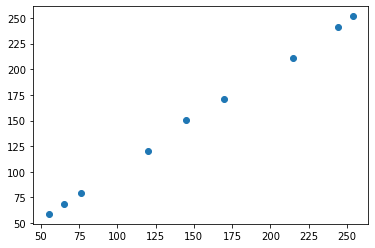

In [107]:
plt.scatter(y_test,predictions)

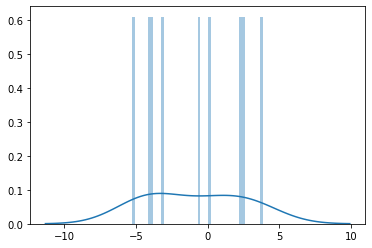

In [108]:
sns.distplot((y_test-predictions),bins=50);

In [109]:
from sklearn import metrics

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.8604855275443697
MSE: 10.684386711545782
RMSE: 3.2686980147370273
